In [1]:
import matplotlib.pyplot as plt
import cv2

In [2]:
cat4 = cv2.imread('../DATA/CATS_DOGS/train/CAT/4.jpg')

In [3]:
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)

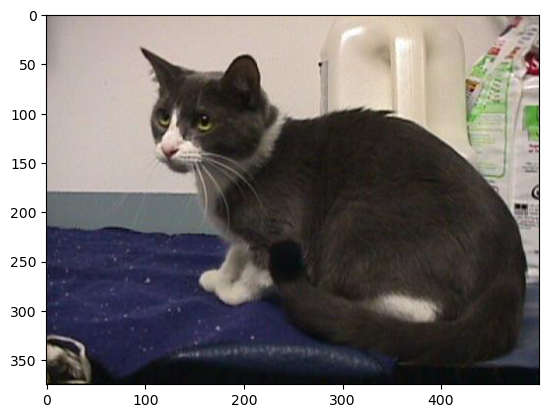

In [4]:
plt.imshow(cat4)

In [5]:
cat4.shape

(375, 500, 3)

In [6]:
dog2 = cv2.imread('../DATA/CATS_DOGS/train/DOG//2.jpg')

In [7]:
dog2 = cv2.cvtColor(dog2, cv2.COLOR_BGR2RGB)

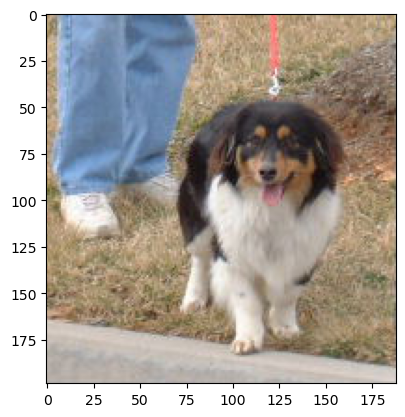

In [8]:
plt.imshow(dog2)

In [9]:
dog2.shape

(199, 188, 3)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

In [12]:
image_gen.random_transform(dog2)

array([[[180, 154, 121],
        [175, 152, 118],
        [184, 167, 131],
        ...,
        [195, 169, 144],
        [185, 159, 134],
        [176, 150, 124]],

       [[183, 157, 124],
        [176, 152, 118],
        [180, 160, 125],
        ...,
        [175, 149, 123],
        [166, 140, 113],
        [166, 140, 113]],

       [[187, 162, 128],
        [179, 154, 121],
        [175, 152, 118],
        ...,
        [167, 141, 114],
        [171, 145, 118],
        [175, 149, 121]],

       ...,

       [[167, 152, 133],
        [165, 151, 132],
        [159, 146, 128],
        ...,
        [180, 175, 171],
        [181, 176, 172],
        [180, 175, 171]],

       [[156, 143, 125],
        [141, 127, 113],
        [126, 112, 100],
        ...,
        [179, 174, 170],
        [181, 176, 172],
        [181, 176, 172]],

       [[124, 110,  99],
        [124, 110,  99],
        [124, 110,  99],
        ...,
        [178, 173, 169],
        [180, 175, 171],
        [181, 176, 172]]

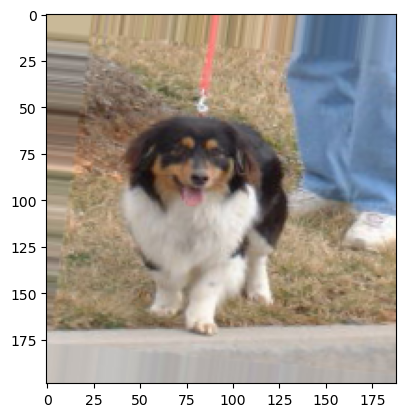

In [15]:
plt.imshow(image_gen.random_transform(dog2))

In [16]:
image_gen.flow_from_directory('../DATA/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [23]:
from keras.models import Sequential

In [30]:
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [31]:
input_shape=(150,150,3)

In [32]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      

In [34]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('../DATA/CATS_DOGS/train/',
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 18743 images belonging to 2 classes.


In [35]:
test_image_gen = image_gen.flow_from_directory('../DATA/CATS_DOGS/test/',
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 6251 images belonging to 2 classes.


In [36]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [37]:
result = model.fit_generator(train_image_gen,epochs=1,
                            steps_per_epoch=150,
                            validation_data=test_image_gen,
                            validation_steps=12)

/tmp/ipykernel_4162/1295744330.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result = model.fit_generator(train_image_gen,epochs=1,


150/150 [==============================] - 15s 97ms/step - loss: 0.6909 - accuracy: 0.5238 - val_loss: 0.7257 - val_accuracy: 0.4479


In [39]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
result.history['accuracy']

[0.5237500071525574]

In [42]:
from keras.models import load_model

In [43]:
new_model = load_model('../Ref/06/cat_dog_100epochs.h5')

In [44]:
dog_file = '../DATA/CATS_DOGS/test/DOG/10005.jpg'

In [51]:
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array

In [52]:
dog_img = load_img(dog_file,target_size=(150,150))

In [53]:
dog_img = img_to_array(dog_img)

In [54]:
dog_img.shape

(150, 150, 3)

In [55]:
import numpy as np
dog_img = np.expand_dims(dog_img,axis=0)

In [56]:
dog_img.shape

(1, 150, 150, 3)

In [57]:
dog_img = dog_img/255

In [58]:
model.predict(dog_img)

1/1 [==============================] - 0s 55ms/step


array([[0.66962093]], dtype=float32)